In [1]:
#% matplotlib inline

from datetime import datetime 
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
cmap = cm.get_cmap('Blues')
import random
from numpy.linalg import lstsq
from pandas.plotting import parallel_coordinates

In [2]:
def get_coordinates(roimask, pixel_list):
#     pixel_list = data_df.index.to_frame(index=False)['roi_ids'].unique()
    coordinates = np.zeros((pixel_list.shape[0], 3))
    for index, pixel in enumerate(pixel_list):
        idx = np.where(roimask==pixel*-1)
        coordinates[index, 1:] = np.array([idx[0][0], idx[1][0]])
        coordinates[index, 0] = pixel
    return coordinates

In [3]:
def get_field_center(dsi_results, roimask, onset_threshold, field_x_threshold):
    roi_list = dsi_results.index.to_frame(index=False)['pixel_id'].unique()
    dsmap0 = roimask*(-1)
    xlength = dsmap0.shape[0]
    ylength = dsmap0.shape[1]

    x_vs_onset = np.zeros((len(roi_list),2))
    i = 0
    for x in range(xlength):
        for y in range(ylength): 
            if dsmap0[x,y] in roi_list:
                roi_index = np.int(dsmap0[x, y])
                dsmap0[x,y] = dsi_results.loc[roi_index, 'mu_max_index'][3]
                if x<field_x_threshold:
                    x_vs_onset[i,:] = [x,  dsi_results.loc[roi_index, 'mu_max_index'][3]]
                else:
                    dsmap0[x,y] = np.nan
                    x_vs_onset[i,:] = [np.nan, np.nan]
                i+=1
            else:
                dsmap0[x,y] = np.nan

    x_vs_onset = x_vs_onset[x_vs_onset[:,0].argsort()]
    # x0 = np.median(np.where(dsmap0 == np.nanmin(x_vs_onset[x_vs_onset[:,1].argsort()], axis=0)[1])[0])
    x0 = np.mean(np.where(dsmap0[0:65,:] < onset_threshold)[0])
    print(x0, np.where(dsmap0[0:65,:] < onset_threshold)[0].shape)
    return x0

In [4]:
def get_center_results(dsi_results, roimask, onset_threshold, field_x_threshold, box_width):
    pixel_list = dsi_results.index.to_frame(index=False)['pixel_id'].unique()
    coordinates = get_coordinates(roimask, pixel_list)
    x = get_field_center(dsi_results, roimask, onset_threshold, field_x_threshold)
    box_bottom = x-box_width
    box_top = x+box_width
    center_rois = coordinates[np.where((box_bottom <= coordinates[:,1]) & (coordinates[:,1] <= box_top)), 0][0]
    center_result = dsi_results.loc[center_rois]
    return center_result

In [5]:
def manual_center_results(dsi_results, roimask, center_loc, box_width):
    pixel_list = dsi_results.index.to_frame(index=False)['pixel_id'].unique()
    coordinates = get_coordinates(roimask, pixel_list)
    x = center_loc
    box_bottom = x-box_width
    box_top = x+box_width
    center_rois = coordinates[np.where((box_bottom <= coordinates[:,1]) & (coordinates[:,1] <= box_top)), 0][0]
    center_result = dsi_results.loc[center_rois]
    return center_result

In [6]:
#pull this data from the hdf5 file
dsi_results1 = pd.read_hdf('Data/Fig1_hij.hdf5', 'dsi_results1')
dsi_results2 = pd.read_hdf('Data/Fig1_hij.hdf5', 'dsi_results2')
dsi_results3 = pd.read_hdf('Data/Fig1_hij.hdf5', 'dsi_results3')
dsi_results4 = pd.read_hdf('Data/Fig1_hij.hdf5', 'dsi_results4')
dsi_results5 = pd.read_hdf('Data/Fig1_hij.hdf5', 'dsi_results5')
dsi_results6 = pd.read_hdf('Data/Fig1_hij.hdf5', 'dsi_results6')
dsi_results7 = pd.read_hdf('Data/Fig1_hij.hdf5', 'dsi_results7')


In [7]:
#pull this data from the hdf5 file

#read hdf5 file for this notebook
f1 = h5py.File("Data/Fig1_hij.hdf5", "r")

#get the data for plotting the sd image
roimask1 = np.array(f1['roimask1'])
roimask2 = np.array(f1['roimask2'])
roimask3 = np.array(f1['roimask3'])
roimask4 = np.array(f1['roimask4'])
roimask5 = np.array(f1['roimask5'])
roimask6 = np.array(f1['roimask6'])
roimask7 = np.array(f1['roimask7'])

f1.close()

In [8]:
#for this field I don't have noise information so I am predicting from onset time
onset_threshold = 52
field_x_threshold = 65
box_width = 12 #this equals ~10 um on either side.

center_results1 = get_center_results(dsi_results1, roimask1, onset_threshold, field_x_threshold, box_width)


24.704225352112676 (71,)


In [9]:
# for cells where I have noise data, manually set the center to the location predicted from noise
center_loc1 = 25

center_loc2 = 40
center_results2 = manual_center_results(dsi_results2, roimask2, center_loc2, box_width)

center_loc3 = 85
center_results3 = manual_center_results(dsi_results3, roimask3, center_loc3, box_width)

center_loc4 = 30
center_results4 = manual_center_results(dsi_results4, roimask4, center_loc4, box_width)

center_loc5 = 30
center_results5 = manual_center_results(dsi_results5, roimask5, center_loc5, box_width)

center_loc6 = 20 # a manual guess. Estimation isn't working great here, but I'm in the ballpark
center_results6 = manual_center_results(dsi_results6, roimask6, center_loc6, box_width)

center_loc7 = 0
center_results7 = manual_center_results(dsi_results7, roimask7, center_loc7, box_width)



In [12]:
center_results1['field_num'] = 1
center_results2['field_num'] = 2
center_results3['field_num'] = 3
center_results4['field_num'] = 4
center_results5['field_num'] = 5
center_results6['field_num'] = 6
center_results7['field_num'] = 7

summary_df = center_results1
summary_df = pd.concat([summary_df, center_results2])
summary_df = pd.concat([summary_df, center_results3])
summary_df = pd.concat([summary_df, center_results4])
summary_df = pd.concat([summary_df, center_results5])
summary_df = pd.concat([summary_df, center_results6])
summary_df = pd.concat([summary_df, center_results7])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


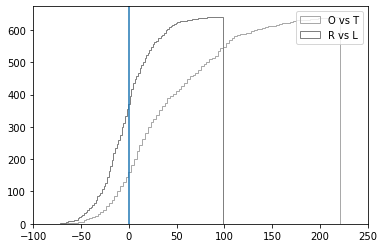

In [14]:
n_bins = 100
plt.hist(summary_df['dsi_100']*-1, n_bins, histtype='step', cumulative=True, label='O vs T', color='darkgrey') # density=True, 
plt.hist(summary_df['dsi_150']*-1, n_bins, histtype='step', cumulative=True, label='R vs L', color='grey') # density=True, 

axes=plt.gca()
axes.axvline()
axes.set_xlim([-100, 250])
plt.legend()

plt.show()

In [15]:
summary_df[['dsi_100', 'dsi_150']].mean()*-1

dsi_100    41.016038
dsi_150    -2.407979
dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


(-0.15, 1.15)

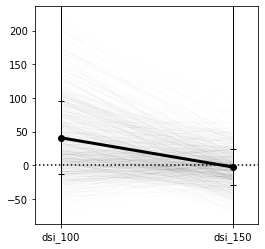

In [16]:
toplot = summary_df.reset_index()*-1

plt.figure(figsize = (4,4))

axes = plt.gca()

ax = plt.subplot(1,1,1)
parallel_coordinates(toplot, 'pixel_id', cols=['dsi_100', 'dsi_150'], color = 'black', linewidth=0.1, alpha=0.1)#colormap='Greys',linestyle='dotted', marker = '.',

plt.plot(summary_df[['dsi_100', 'dsi_150']].mean()*-1, color='k', linewidth=3, marker='o')
plt.plot(summary_df[['dsi_100', 'dsi_150']].mean()*-1+summary_df[['dsi_100', 'dsi_150']].std(),  color='k', linestyle='', marker='_')
plt.plot(summary_df[['dsi_100', 'dsi_150']].mean()*-1-summary_df[['dsi_100', 'dsi_150']].std(),  color='k', linestyle='', marker='_')


ax.legend().remove()
ax.grid(False)
ax.axhline(color='k', linestyle='dotted')
axes.set_xlim([-0.15,1.15])

plt.show()

In [17]:
def add_coordinates(dsi_results, roimask, center_loc):
    
    pixel_list = dsi_results.index.to_frame(index=False)['pixel_id'].unique()
    coordinates = get_coordinates(roimask, pixel_list)
    dsi_results['x_coordinate'] = coordinates[:,1]
    dsi_results['x_centered'] = dsi_results['x_coordinate'] - center_loc
    
    return dsi_results

In [19]:
dsi_results1 = add_coordinates(dsi_results1, roimask1, center_loc1)
dsi_results2 = add_coordinates(dsi_results2, roimask2, center_loc2)
dsi_results3 = add_coordinates(dsi_results3, roimask3, center_loc3)
dsi_results4 = add_coordinates(dsi_results4, roimask4, center_loc4)
dsi_results5 = add_coordinates(dsi_results5, roimask5, center_loc5)
dsi_results6 = add_coordinates(dsi_results6, roimask6, center_loc6)
dsi_results7 = add_coordinates(dsi_results7, roimask7, center_loc7)

dsi_results1['field_num'] = 1
dsi_results2['field_num'] = 2
dsi_results3['field_num'] = 3
dsi_results4['field_num'] = 4
dsi_results5['field_num'] = 5
dsi_results6['field_num'] = 6
dsi_results7['field_num'] = 7

sum_df = dsi_results1
sum_df = pd.concat([sum_df, dsi_results2])
# sum_df = dsi_results2
sum_df = pd.concat([sum_df, dsi_results3])
sum_df = pd.concat([sum_df, dsi_results4])
sum_df = pd.concat([sum_df, dsi_results5])
sum_df = pd.concat([sum_df, dsi_results6])
sum_df = pd.concat([sum_df, dsi_results7])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


In [20]:
var_before = np.array(sum_df['x_centered'])
var = np.where(var_before>50, 100-var_before, var_before)
sum_df['x_centered_var'] = var
dsi_before = np.array(sum_df['dsi_100'])
dsi_var = np.where(var_before>50, dsi_before*-1, dsi_before)
sum_df['dsi_100_var'] = dsi_var

dsi_before = np.array(sum_df['dsi_150'])
dsi_var = np.where(var_before>50, dsi_before*-1, dsi_before)
sum_df['dsi_150_var'] = dsi_var

dsi_before = np.array(sum_df['dsi_300'])
dsi_var = np.where(var_before>50, dsi_before*-1, dsi_before)
sum_df['dsi_300_var'] = dsi_var

In [21]:
resamp_p = 3
sum_df = sum_df.reset_index()
sum_df['x_binned'] = sum_df['x_centered'].apply(
            lambda x_t: resamp_p * (round(x_t / resamp_p)))
sum_df = sum_df.set_index('x_binned')

sum_df_avgs = sum_df.groupby(['x_binned']).mean()
sum_df_stds =  sum_df.groupby(['x_binned']).std()
sum_df_stds['top_100']=sum_df_stds['dsi_100']+sum_df_avgs['dsi_100']
sum_df_stds['bottom_100']=sum_df_avgs['dsi_100']-sum_df_stds['dsi_100']
sum_df_stds['top_150']=sum_df_stds['dsi_150']+sum_df_avgs['dsi_150']
sum_df_stds['bottom_150']=sum_df_avgs['dsi_150']-sum_df_stds['dsi_150']
sum_df_stds['top_300']=sum_df_stds['dsi_300']+sum_df_avgs['dsi_300']
sum_df_stds['bottom_300']=sum_df_avgs['dsi_300']-sum_df_stds['dsi_300']

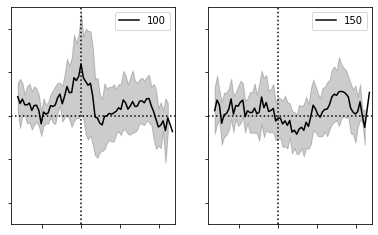

In [23]:
#plot the d' as a function of ROI location

fig = plt.figure(figsize=(10, 4))

xbottom = -90
xtop = 120

ax0 = fig.add_subplot(1,3,1)
plt.plot(sum_df_avgs['dsi_100'], label='100', color = 'k')
xvals = sum_df_stds.index.to_frame(index=False)['x_binned']
plt.fill_between(xvals, sum_df_stds['top_100'], sum_df_stds['bottom_100'], alpha=0.2, color='k')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.axhline(y=0, color='k', linestyle='dotted')
plt.legend()
axes = plt.gca()
axes.set_ylim([125,-125])
axes.set_xlim([xbottom, xtop])
axes.set_yticklabels([])
axes.set_xticklabels([])

ax1 = fig.add_subplot(1,3,2)
plt.plot(sum_df_avgs['dsi_150'], label='150', color = 'k')
plt.fill_between(xvals, sum_df_stds['top_150'], sum_df_stds['bottom_150'], alpha=0.2, color='k')
plt.axvline(x=0, color='k', linestyle='dotted')
plt.axhline(y=0, color='k', linestyle='dotted')
plt.legend()
axes = plt.gca()
axes.set_ylim([125,-125])
axes.set_xlim([xbottom, xtop])
axes.set_yticklabels([])
axes.set_xticklabels([])

plt.show()

# Statistics

In [24]:
summary_df = summary_df.reset_index()
cols = ['field_num', 'pixel_id']
summary_df['field_pixel'] = summary_df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

just_dprimes = summary_df[['field_pixel','dsi_100','dsi_150','dsi_300']]

stats_df = just_dprimes.melt(id_vars="field_pixel")

In [25]:
import pingouin as pg

# Compute the 1-way repeated measures ANOVA. This will return a dataframe.
pg.rm_anova(dv='value', within=['variable'], subject='field_pixel', data=stats_df, correction=True, detailed=True)

,Source,SS,DF,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,variable,6.988955e+05,2,349447.729002,216.472499,1.043742e-81,3.796409e-60,0.252749,0.725494,False,0.621629,1.079301e-66
1,Error,2.066281e+06,1280,1614.282327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/gpfs01/euler/User/avlasits/.local/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.8, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/gpfs01/euler/User/avlasits/.local/lib/python3.6/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [26]:
# Optional post-hoc tests
pg.pairwise_ttests(dv='value', within=['variable'], subject='field_pixel', data=stats_df)

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,hedges
0,variable,dsi_100,dsi_150,True,True,-20.820171,640.0,two-sided,6.579447e-74,1.849e+70,-1.018116
1,variable,dsi_100,dsi_300,True,True,-12.938055,640.0,two-sided,3.533092e-34,6.411e+30,-0.836486
2,variable,dsi_150,dsi_300,True,True,4.112982,640.0,two-sided,4.415405e-05,180.736,0.240894


In [27]:
#perform Wilcoxon test

#100 vs 150
pg.wilcoxon(just_dprimes['dsi_100'], just_dprimes['dsi_150'])

,W-val,tail,p-val,RBC,CLES
Wilcoxon,25243.0,two-sided,1.535013e-61,-0.754638,0.243243
